In [1]:
# Description: Plot Figure S2 (Synoptic near-surface velocity profiles from GO-SHIP cruises).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        May/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import open_dataset

In [3]:
names = ["BC_synop.nc", "GC_synop.nc", "ACnorth_synop.nc", "ACsouth_synop.nc"]
xmax = 150
cols = ["r", "y", "k", "b"]
head = "../../data/derived/"

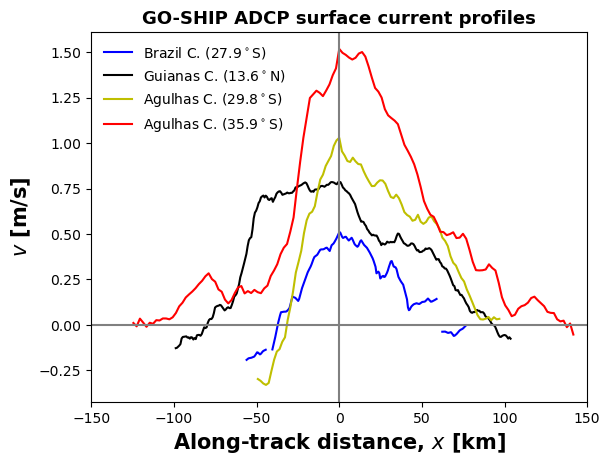

In [4]:
fig, ax = plt.subplots()
for f in names:
    ds = open_dataset(head + f)
    x = ds["x"].values
    u = ds["u"].values
    fm = np.where(x==0)[0][0]
    lat0 = np.abs(ds["lat"].values[fm])

    if "GC" in f:
        label = "Guianas C. (%1.1f$^\circ$N)"%lat0
    elif "BC_" in f:
        label = "Brazil C. (%1.1f$^\circ$S)"%lat0
    elif "AC" in f:
        label = "Agulhas C. (%1.1f$^\circ$S)"%lat0

    ax.plot(x, u, cols.pop(), label=label)

ax.set_xlim(-xmax, xmax)
ax.legend(frameon=False)
ax.axhline(color="gray", linestyle="solid")
ax.axvline(color="gray", linestyle="solid")
ax.set_xlabel("Along-track distance, $x$ [km]", fontsize=15, fontweight="black")
ax.set_ylabel("$v$ [m/s]", fontsize=15, fontweight="black")
ax.set_title("GO-SHIP ADCP surface current profiles", fontsize=13, fontweight="black");

In [5]:
fig.savefig("figS2.png", bbox_inches="tight", dpi=150)